#Part 1

Create an apache spark environment and load the dataset provided. You may use CoLab or a jupyter notebook. Please create a table providing summary statistics of this dataset, i.e. mean values, range, standard deviations, min/max values, median values and 25%/50%/75% percentile values. Comment on whether there are any missing values present throughout. The column that contains the labels (normal/abnormal) should not be part of the table

In [1]:
pip install handyspark

     |████████████████████████████████| 212.3MB 70kB/s 
     |████████████████████████████████| 204kB 23.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=d54b40ce82f448d87b104e16df90156606e62ab34308e8c20bb35954d5823902
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os       
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [4]:
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [5]:
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

In [6]:
!pip install -q findspark

In [7]:
#To find the GPU information allocated to play with run the below snippet of code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=dd27125fdcb966e956256c05e0e1eaabf89967e629246d261dabcc70087893d2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 128.4 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [8]:
import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

In [10]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Creating function to export spark dataframe to pandas
def export_table(spark_df):
  df = spark_df.toPandas()
  df = df.transpose()
  new_header = df.iloc[0]
  df = df[1:] #take the data less the header row
  df.columns = new_header #set the header row as the df header
  return df

In [12]:
import pandas as pd
read_file = pd.read_excel ('/content/drive/MyDrive/Masters/Semester 2/Data Mining & Visualisation/Assessments/Assessment2/CS551G_DMV_Assessment_2_Dataset.xlsx')
data = spark.createDataFrame(read_file)

In [13]:
data.show(10)
data.count(), len(data.columns)

+------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Temperature_Sensor_1|Temperature_Sensor_2|Temperature_Sensor_3|Flow_Rate_Sensor_1|Flow_Rate_Sensor_2|Flow_Rate_Sensor_3|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Vibration_Sensor_1|Vibration_Sensor_2|Vibration_Sensor_3|
+------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                6.34|            1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|              4.4284

(996, 13)

In [14]:
data_temporary = data.drop(*['Status']) #We create a temporary dataframe and drop the (Status)
data_temporary.summary().show()

+-------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Temperature_Sensor_1|Temperature_Sensor_2|Temperature_Sensor_3|Flow_Rate_Sensor_1|Flow_Rate_Sensor_2|Flow_Rate_Sensor_3|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Vibration_Sensor_1|Vibration_Sensor_2|Vibration_Sensor_3|
+-------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|                 996|                 996|                 996|               996|               996|               996|               996|               996|               996|               996|               996|               996|
|   mean|  4.99957389357

In [15]:
#data_temp = data.drop(*['Status']) #Created temporary dataframe to drop 'Status' column
#summary1 = data_temp.describe()‹

#pct_values = [0.25, 0.5, 0.75,]
#col = data_temp.columns
#summary2 = spark.createDataFrame(zip(['0.25%', 'median', '0.75%'], *data.approxQuantile(col, pct_values, 0)), ["summary"] + col)
#Ref: Used function approxQuantile() from https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html modified it to include parameters and created Spark DataFrame 

#summary1.show()
#summary2.show()

# Part 2
Visualise the data as follows: create two plots, i.e. box plot and a scatter plot. The box plot shall include the two classes (normal/abnormal) in the x-axis, and the “Vibration_Sensor_1” in the y-axis. The scatter plot shall include the feature “Vibration_Sensor_2” with the graphs of both classes appearing in the same plot (different colour or symbol). Please elaborate on what information one can obtain from each of these two plots.

Box Plot Code Reference:
https://towardsdatascience.com/handyspark-bringing-pandas-like-capabilities-to-spark-dataframes-5f1bcea9039e

In [16]:
#PLotting Boxplot
from matplotlib import pyplot as plt
from handyspark import *
hdf = data.toHandy()

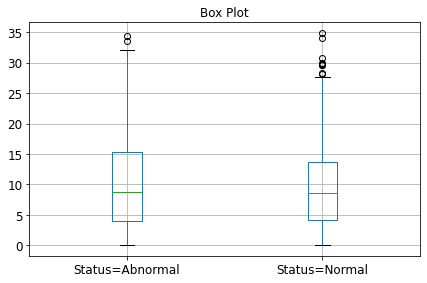

In [17]:
hdf.stratify(['Status']).cols['Vibration_Sensor_1'].boxplot(figsize=(6, 4));
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.title("Box Plot");

Scatter Plot Code using SeaBorn Reference: https://s3.amazonaws.com/assets.datacamp.com/production/course_6919/slides/chapter1.pdf

In [18]:
#plot_data = pd.read_excel ('/content/drive/MyDrive/Masters/Semester 2/Data Mining & Visualisation/Assessments/Assessment2/CS551G_DMV_Assessment_2_Dataset.xlsx')

#Normal   = plot_data[plot_data.Status == "Normal"]
#Abnormal = plot_data[plot_data.Status == "Abnormal"] 
#Normal.reset_index(inplace=True) 
#Abnormal.reset_index(inplace=True) 

#Normal = Normal.drop("Status", axis =1)
#Abnormal = Abnormal.drop("Status", axis =1)

#data = [Normal.Vibration_Sensor_2, Abnormal.Vibration_Sensor_2]

#plt.figure(figsize=(16, 6))

#ax2 = plt.subplot(122)
#pt = sns.scatterplot(data=Normal.Vibration_Sensor_2, label="Normal")
#pt = sns.scatterplot(data=Abnormal.Vibration_Sensor_2, label="Abnormal")
#plt.xlabel("Distance")
#plt.ylabel("Vibration_Sensor_2")
#plt.show()

#Part 3
Using the Apache spark ecosystem, such as pyspark, sparksql or any other component needed, please develop and train a binary logistic regression model to classify the condition of nuclear reactors, i.e. normal or abnormal, based on how they operate. Split the dataset provided into a training (75%) and test (25%) sets. Please use the training set to train your developed model keeping the test set only for evaluating its performance in unseen data

Label Binarization Reference: https://spark.apache.org/docs/latest/ml-features

In [19]:
from pyspark.ml.feature import StringIndexer
labelIndexer = StringIndexer(inputCol="Status", outputCol="label").fit(data)
data = labelIndexer.transform(data)
data.select("Status","label").rdd.takeSample(False, 5, seed=0)

[Row(Status='Normal', label=1.0),
 Row(Status='Abnormal', label=0.0),
 Row(Status='Normal', label=1.0),
 Row(Status='Abnormal', label=0.0),
 Row(Status='Normal', label=1.0)]

Features Vectorizatition Reference: https://spark.apache.org/docs/latest/ml-features

In [20]:
#Features Vectorizatition 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
import py4j

data = data.drop(*['Status'])
inputcols = np.array(data.columns)[np.array(data.columns)!='label']
assembler = VectorAssembler(inputCols= inputcols, outputCol = "predictors")

predictors = assembler.transform(data)
model_data = predictors.select("predictors", "label")
model_data.show(5,truncate=False)

+----------------------------------------------------------------------------------------+-----+
|predictors                                                                              |label|
+----------------------------------------------------------------------------------------+-----+
|[4.5044,0.7443,6.34,1.9052,29.5315,0.8647,2.2044,6.048,14.4659,21.648,15.3429,1.2186]   |1.0  |
|[4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483]|1.0  |
|[4.5291,1.0199,6.113,1.0565,26.4271,1.9247,1.942,6.7162,5.3358,11.0779,25.0914,9.2408]  |1.0  |
|[5.1727,1.0007,7.8589,0.2765,25.1576,2.609,2.9234,6.7485,1.9017,1.8463,28.664,4.0157]   |1.0  |
|[5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.37,34.8122,13.4966]  |1.0  |
+----------------------------------------------------------------------------------------+-----+
only showing top 5 rows



Random Forest Classifier Reference: https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier

In [21]:
from pyspark.ml.classification import RandomForestClassifier
train_data, test_data = model_data.randomSplit([0.70,0.30], seed=1)

random_forest = RandomForestClassifier(featuresCol = 'predictors', labelCol=  'label')
random_forest_Model = random_forest.fit(train_data)

random_forest_pred = random_forest_Model.transform(test_data) 
random_forest_pred.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|          predictors|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.1447,5.5261,7....|  1.0|[5.97512679164194...|[0.29875633958209...|       1.0|
|[0.4724,4.9612,8....|  1.0|[14.4680793133227...|[0.72340396566613...|       0.0|
|[0.8276,11.4771,1...|  1.0|[4.39933481563825...|[0.21996674078191...|       1.0|
|[0.856,4.6408,6.5...|  1.0|[10.3505343578496...|[0.51752671789248...|       0.0|
|[1.1609,4.8175,7....|  1.0|[4.85315966470711...|[0.24265798323535...|       1.0|
|[1.3065,5.3293,7....|  1.0|[11.1218792460362...|[0.55609396230181...|       0.0|
|[1.4502,4.3204,7....|  1.0|[15.5202177333123...|[0.77601088666561...|       0.0|
|[1.5271,5.0052,7....|  1.0|[11.7722853556965...|[0.58861426778482...|       0.0|
|[1.6333,9.2532,10...|  1.0|[12.8120543866614...|[0.64060271933307...|       0.0|
|[1.6681,5.8282,

# Part 4
Use the following three metrics to report the model’s performance, i.e. Precision/Recall, Accuracy and Area under the curve (AUROC). When reporting performance, please only use the test set created by yourselves.

Evaluation Metrics Reference: https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html

In [31]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

ran_forest = random_forest_pred.select("prediction","label")
true_positive = ran_forest[(ran_forest.prediction == 1) & (ran_forest.label == 1)].count()
true_negative = ran_forest[(ran_forest.prediction == 0) & (ran_forest.label == 0)].count()
false_positive = ran_forest[(ran_forest.prediction == 0) & (ran_forest.label == 1)].count()
false_negative = ran_forest[(ran_forest.prediction == 1) & (ran_forest.label == 0)].count()

confusion_matrix = np.array([[true_positive, false_positive], [false_negative, true_negative]])
col_name = ["Real Abnormal", 'Real Normal']
row_name = ['Predicted Abnormal', 'Predicted Normal']
df_confusion_matrix = pd.DataFrame(confusion_matrix, index = [i for i in col_name],
                      columns = [i for i in row_name])

evaluator = BinaryClassificationEvaluator()
auroc = evaluator.evaluate(random_forest_pred)

print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative))
print('Precision: ', true_positive / (true_positive + false_positive))
print('Recall: ', true_positive / (true_positive + false_negative))
print('Test Area Under ROC: ', auroc)
print('\n\nConfusion Matrix:\n', df_confusion_matrix)

Accuracy:  0.8426573426573427
Precision:  0.8085106382978723
Recall:  0.8636363636363636
Test Area Under ROC:  0.9279041330398623


Confusion Matrix:
                Predicted Abnormal  Predicted Normal
Real Abnormal                 114                27
Real Normal                    18               127


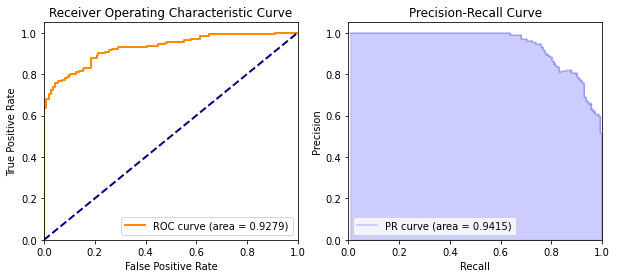

In [24]:
#Plotting ROC and PR Curve
from handyspark import BinaryClassificationMetrics

bcm = BinaryClassificationMetrics(random_forest_pred, scoreCol='probability', labelCol='label')
fig, axs = plt.subplots(1, 2, figsize=(10,4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1]);

### **PART 5 (MULTI-LAYER PERCEPTRON CLASSIFIER)**

Repeat steps 3 and 4 but using a multilayer perceptron classifier this time


Multi-Layer Perceptron Classifier Reference: https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier

In [32]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

if __name__ == "__main__":
    spark = SparkSession\
        .builder.appName("multilayer_perceptron_classification_example").getOrCreate()

inputs = np.array(data.columns)[np.array(data.columns)!= 'label'] 
print(len(inputs))

layers = [len(inputs), 5, 4, 4, 3 , 2]
# create the trainer and set its parameters
mlp_trainer = MultilayerPerceptronClassifier(featuresCol = 'predictors', labelCol=  'label', maxIter=100, layers=layers, blockSize=128, seed=1)

# train the model
model = mlp_trainer.fit(train_data)

# compute accuracy on the test set
result = model.transform(test_data)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

12
Test set accuracy = 0.6958041958041958


In [33]:
# Evaluating on Test Data
true_positive = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 1)].count()
true_negative = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 0)].count()
false_positive = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 1)].count()
false_negative = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 0)].count()

print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative))

Accuracy:  0.6958041958041958


In [34]:
#Splitting training data into training data and validation data
train_data, val_data = train_data.randomSplit([0.70,0.30], seed=100)
train_data.count(), val_data.count()

(508, 202)

#*Fine Tuning Model*

In [35]:
#Code adapted from how-to-use guide available form Ref: https://spark.apache.org/docs/latest/ml-classification-regression.html
mlp_trainer = MultilayerPerceptronClassifier(featuresCol = 'predictors', labelCol=  'label', maxIter=100, layers=layers, blockSize=128, seed=1)
model = mlp_trainer.fit(train_data)
result = model.transform(val_data)
predictionAndLabels = result.select("prediction", "label")

In [38]:
# Running Iterations for GBT Classifier Model with Validation dataset
accuracy_scores = []
i = 0
for n_iter in range(1,100):
  i +=1
  mlp_trainer = MultilayerPerceptronClassifier(featuresCol = 'predictors', labelCol=  'label', maxIter=n_iter, layers=layers, blockSize=128, seed=1234)
  model = mlp_trainer.fit(train_data)
  result = model.transform(test_data)
  predictionAndLabels = result.select("prediction", "label")

  true_positive = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 1)].count()
  true_negative = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 0)].count()
  false_positive = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 1)].count()
  false_negative = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 0)].count()
  Accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

  print('Iteration:', n_iter, '  Accuracy:', Accuracy * 100)
  accuracy_scores.append(Accuracy) 

Iteration: 1   Accuracy: 49.3006993006993
Iteration: 2   Accuracy: 50.6993006993007
Iteration: 3   Accuracy: 50.6993006993007
Iteration: 4   Accuracy: 50.6993006993007
Iteration: 5   Accuracy: 50.6993006993007
Iteration: 6   Accuracy: 50.6993006993007
Iteration: 7   Accuracy: 50.6993006993007
Iteration: 8   Accuracy: 50.6993006993007
Iteration: 9   Accuracy: 50.6993006993007
Iteration: 10   Accuracy: 50.6993006993007
Iteration: 11   Accuracy: 50.6993006993007
Iteration: 12   Accuracy: 50.6993006993007
Iteration: 13   Accuracy: 50.6993006993007
Iteration: 14   Accuracy: 50.6993006993007
Iteration: 15   Accuracy: 50.6993006993007
Iteration: 16   Accuracy: 50.6993006993007
Iteration: 17   Accuracy: 50.6993006993007
Iteration: 18   Accuracy: 57.34265734265735
Iteration: 19   Accuracy: 58.04195804195804
Iteration: 20   Accuracy: 58.74125874125874
Iteration: 21   Accuracy: 62.58741258741259
Iteration: 22   Accuracy: 59.44055944055944
Iteration: 23   Accuracy: 59.09090909090909
Iteration: 24 

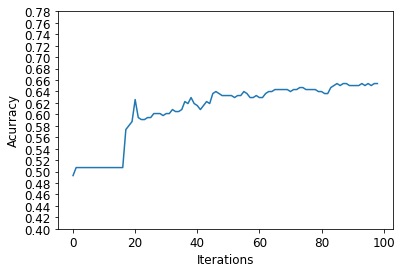

In [39]:
#Plotting Accuracy Scores
plt.plot(accuracy_scores);
plt.xlabel("Iterations", fontsize = 12)
plt.ylabel("Acurracy", fontsize = 12)
plt.yticks(np.arange(0.40, 0.80, 0.02), fontsize = 12);
plt.xticks(fontsize = 12);

In [ ]:
mlp_trainer = MultilayerPerceptronClassifier(featuresCol = 'predictors', labelCol=  'label', maxIter=n_iter, layers=layers, blockSize=128, seed=1234)
model = mlp_trainer.fit(train_data)
result = model.transform(test_data)
predictionAndLabels = result.select("prediction", "label")

In [41]:
true_positive = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 1)].count()
true_negative = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 0)].count()
false_positive = predictionAndLabels[(predictionAndLabels.prediction == 0) & (predictionAndLabels.label == 1)].count()
false_negative = predictionAndLabels[(predictionAndLabels.prediction == 1) & (predictionAndLabels.label == 0)].count()

confusion_matrix = np.array([[tp, fp], [fn, tn]])
col_name = ["Actual Abnormal", 'Actual Normal']
row_name = ['Predicted Abnormal', 'Predicted Normal']
df_confusion_matrix = pd.DataFrame(cm, index = [i for i in col_name],
                      columns = [i for i in row_name])

auroc = evaluator.evaluate(result)

print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative))
print('Precision: ', true_positive / (true_positive + false_positive))
print('Recall: ', true_positive / (true_positive + false_negative))
print('Test Area Under ROC: ', auroc)
print('\n\nConfusion Matrix:\n', df_confusion_matrix)

Accuracy:  0.6538461538461539
Precision:  0.6099290780141844
Recall:  0.6615384615384615
Test Area Under ROC:  0.6538461538461539


Confusion Matrix:
                  Predicted Abnormal  Predicted Normal
Actual Abnormal                 114                27
Actual Normal                    18               127


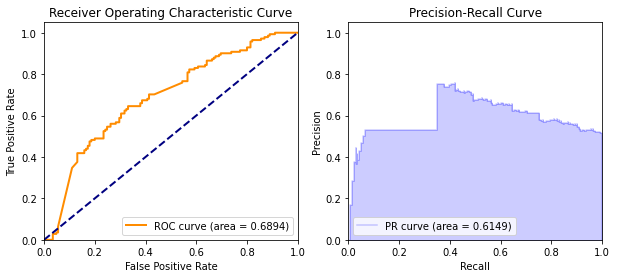

In [ ]:
bcm = BinaryClassificationMetrics(result, scoreCol='probability', labelCol='label')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1]);

#plt.savefig('/content/drive/My Drive/00_Asssessment/Spark/figure/roc_gbt_test.png', dpi=200)